In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\harsh\Desktop\MLOps_House_price\data\Bengaluru_House_Data.csv')
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5150,Super built-up Area,Ready To Move,Seegehalli,2 BHK,NaN,1096,2.0,1.0,41.0
7491,Plot Area,Ready To Move,Kenchenahalli,4 Bedroom,NaN,1200,3.0,2.0,125.0
9135,Super built-up Area,Ready To Move,Mico Layout,1 BHK,Coora S,800,1.0,1.0,29.5
11379,Built-up Area,Ready To Move,Chandapura,2 BHK,NaN,800,1.0,2.0,30.0
6131,Built-up Area,Ready To Move,Sarjapur,4 Bedroom,NaN,2100,3.0,1.0,125.0


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
for column in df.columns:
    print('Column:',column)
    print(df[column].value_counts())
    print('\n\n\n')

Column: area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64




Column: availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64




Column: location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64




Column: size
2 BHK         

### Unique values in every Column

In [7]:
for column in df.columns:
    print('Column:',column)
    print(df[column].nunique())


Column: area_type
4
Column: availability
81
Column: location
1305
Column: size
31
Column: society
2688
Column: total_sqft
2117
Column: bath
19
Column: balcony
4
Column: price
1994


<Axes: ylabel='area_type'>

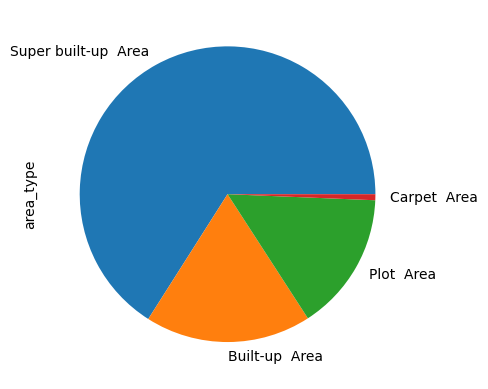

In [8]:
df['area_type'].value_counts().plot(kind='pie')

<Axes: >

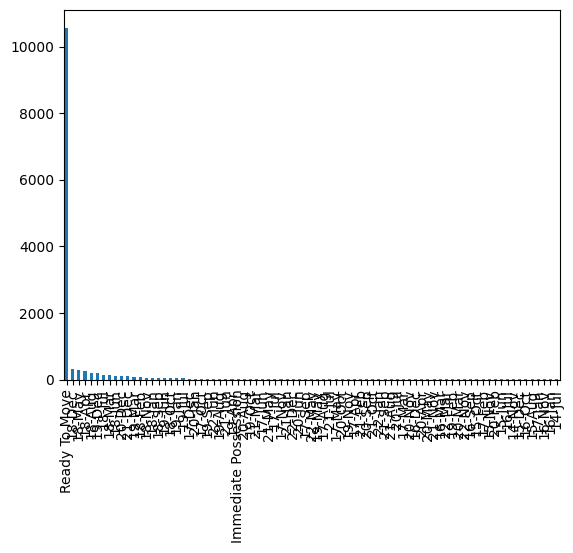

In [9]:
df['availability'].value_counts().plot(kind='bar')

[]

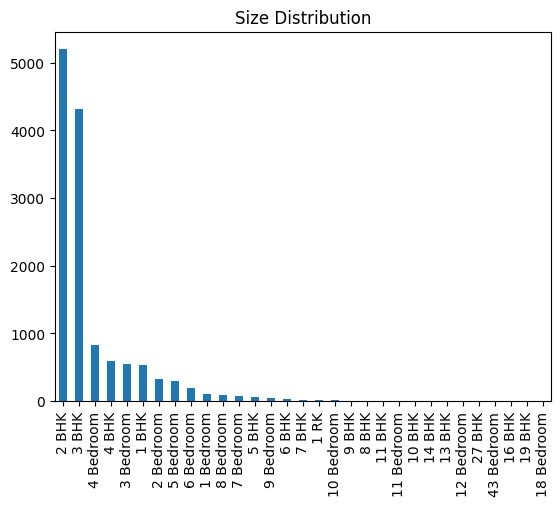

In [10]:
df['size'].value_counts().plot(kind='bar')
plt.title('Size Distribution')
plt.plot()

[]

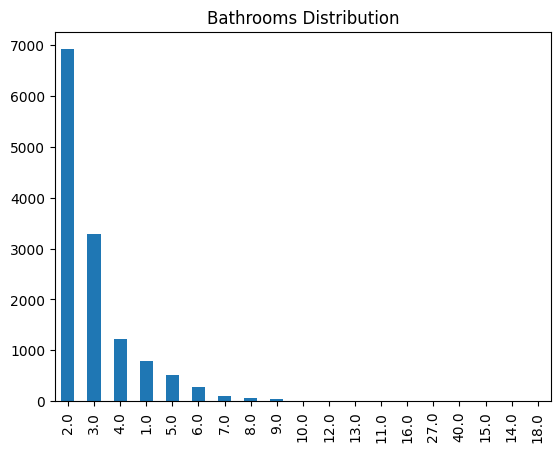

In [11]:
df['bath'].value_counts().plot(kind='bar')
plt.title('Bathrooms Distribution')
plt.plot()

[]

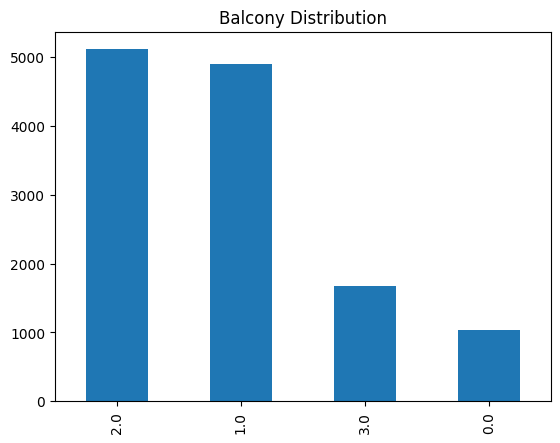

In [12]:
df['balcony'].value_counts().plot(kind='bar')
plt.title('Balcony Distribution')
plt.plot()

In [13]:
df.drop(columns=['area_type','availability','balcony','society'],inplace=True)

In [14]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [16]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [17]:
df['location']=df['location'].fillna('Whitefield')

In [18]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [19]:
df['size']=df['size'].fillna('2 BHK')

In [20]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [22]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [23]:
df.drop(columns=['size'],inplace=True)

In [24]:
df[df['bhk']>5]

,location,total_sqft,bath,price,bhk
9,Gandhi Bazar,1020,6.0,370.0,6
45,HSR Layout,600,9.0,200.0,8
58,Murugeshpalya,1407,4.0,150.0,6
64,Bommanahalli,3000,8.0,140.0,8
68,Devarachikkanahalli,1350,7.0,85.0,8
...,...,...,...,...,...
13221,T Dasarahalli,1178,9.0,75.0,9
13226,Raja Rajeshwari Nagar,6000,8.0,215.0,8
13277,Kundalahalli Colony,1400,7.0,218.0,7
13279,Vishwanatha Nagenahalli,1200,5.0,130.0,6


In [25]:
df.describe()

,bath,price,bhk
count,13320.000000,13320.000000,13320.000000
mean,2.688814,112.565627,2.802778
std,1.338754,148.971674,1.294496
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


### Removing outliers

In [26]:
df=df[df['bhk']<6]

In [27]:
df.shape

(12830, 5)

In [28]:
df.describe()

,bath,price,bhk
count,12830.000000,12830.000000,12830.000000
mean,2.532970,107.781149,2.631567
std,0.959608,138.034123,0.849930
min,1.000000,8.000000,1.000000
25%,2.000000,49.000000,2.000000
50%,2.000000,70.000000,3.000000
75%,3.000000,115.000000,3.000000
max,8.000000,2912.000000,5.000000


In [29]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
def rangeToValue(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0]) + float(temp[1]))/2  
    try:
        return float(x)
    except:
        return None


In [31]:
df['total_sqft']=df['total_sqft'].apply(rangeToValue)

In [32]:
df['total_sqft'].info()

<class 'pandas.core.series.Series'>
Int64Index: 12830 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
12788 non-null  float64
dtypes: float64(1)
memory usage: 200.5 KB


In [33]:
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [34]:
df['price_per_sqft']=df['price']*100000 / df['total_sqft']

In [35]:
df['location'].value_counts()[df['location'].value_counts()>50]

Whitefield                  540
Sarjapur  Road              399
Electronic City             301
Kanakpura Road              273
Thanisandra                 231
Yelahanka                   209
Uttarahalli                 179
Hebbal                      174
Marathahalli                173
Raja Rajeshwari Nagar       164
Hennur Road                 151
Bannerghatta Road           150
7th Phase JP Nagar          144
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                101
Chandapura                   99
Bellandur                    95
Electronics City Phase 1     87
Hoodi                        85
Begur Road                   84
Yeshwanthpur                 83
KR Puram                     82
Sarjapur                     82
Kasavanhalli                 80
Harlur                       79
Hormavu                      73
Banashankari                 73
Hosa Road                    71
Jakkur                       71
Old Madras Road              71
Koramang

In [36]:
location_count=df['location'].value_counts()[df['location'].value_counts()>50]
location_count

Whitefield                  540
Sarjapur  Road              399
Electronic City             301
Kanakpura Road              273
Thanisandra                 231
Yelahanka                   209
Uttarahalli                 179
Hebbal                      174
Marathahalli                173
Raja Rajeshwari Nagar       164
Hennur Road                 151
Bannerghatta Road           150
7th Phase JP Nagar          144
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                101
Chandapura                   99
Bellandur                    95
Electronics City Phase 1     87
Hoodi                        85
Begur Road                   84
Yeshwanthpur                 83
KR Puram                     82
Sarjapur                     82
Kasavanhalli                 80
Harlur                       79
Hormavu                      73
Banashankari                 73
Hosa Road                    71
Jakkur                       71
Old Madras Road              71
Koramang

In [37]:
df['location']=df['location'].apply(lambda x: 'other' if x not in location_count else x )

In [38]:
df['location'].nunique()

53

In [39]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12788.000000,12830.000000,12830.000000,12830.000000,1.278800e+04
mean,1533.206034,2.532970,107.781149,2.631567,7.549786e+03
std,1128.808509,0.959608,138.034123,0.849930,1.065081e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,49.000000,2.000000,4.249972e+03
50%,1275.000000,2.000000,70.000000,3.000000,5.362469e+03
75%,1656.750000,3.000000,115.000000,3.000000,7.090909e+03
max,52272.000000,8.000000,2912.000000,5.000000,1.200000e+07


In [40]:
(df['total_sqft']/df['bhk']).describe()

count    12788.000000
mean       584.898753
std        385.307990
min          0.250000
25%        483.333333
50%        558.000000
75%        627.500000
max      26136.000000
dtype: float64

In [41]:
df=df[(df['total_sqft']/df['bhk'])>=300]

In [42]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12347.000000,12347.000000,12347.000000,12347.000000,12347.000000
mean,1558.682252,2.497935,107.843321,2.585972,6260.546285
std,1139.279180,0.928633,140.102543,0.805753,4071.681132
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1113.060000,2.000000,49.000000,2.000000,4210.526316
50%,1298.000000,2.000000,69.000000,3.000000,5291.005291
75%,1682.500000,3.000000,113.000000,3.000000,6888.305313
max,52272.000000,8.000000,2912.000000,5.000000,176470.588235


<Axes: ylabel='Density'>

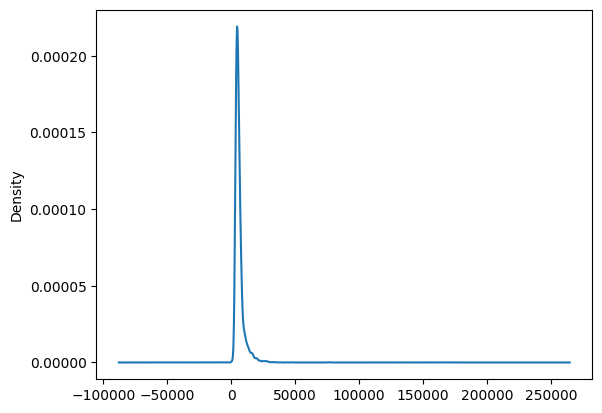

In [43]:
df['price_per_sqft'].plot(kind='kde')

,total_sqft,bath,price,bhk,price_per_sqft
count,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000
mean,1471.872918,2.416136,85.501069,2.519678,5499.223237
std,768.360661,0.842867,68.002922,0.751836,1917.504088
min,300.000000,1.000000,10.000000,1.000000,1875.000000
25%,1100.000000,2.000000,48.000000,2.000000,4200.000000
50%,1275.000000,2.000000,65.257500,2.000000,5143.229167
75%,1625.000000,3.000000,97.000000,3.000000,6379.208506
max,30000.000000,8.000000,2100.000000,5.000000,17741.935484


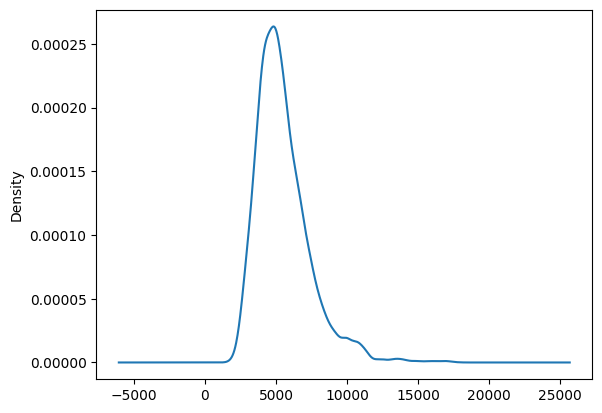

In [44]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby( 'location'):
        m= np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft >(m-st)) & (subdf.price_per_sqft< (m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
df=remove_outliers_sqft(df)
df['price_per_sqft'].plot(kind='kde')
df.describe()

In [45]:
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,7th Phase JP Nagar,1080.0,2.0,72.0,2,6666.666667
1,7th Phase JP Nagar,1270.0,2.0,93.0,2,7322.834646
2,7th Phase JP Nagar,1420.0,2.0,100.0,3,7042.253521
3,7th Phase JP Nagar,1850.0,3.0,150.0,3,8108.108108
4,7th Phase JP Nagar,1245.0,2.0,94.0,2,7550.200803
...,...,...,...,...,...,...
10667,other,1805.0,3.0,134.0,3,7423.822715
10668,other,1715.0,3.0,112.0,3,6530.612245
10669,other,3600.0,5.0,400.0,4,11111.111111
10670,other,4689.0,4.0,488.0,4,10407.336319


In [46]:
df.drop(columns=['price_per_sqft'],inplace=True)

In [47]:
df['bath']=df['bath'].astype(int)
df

,location,total_sqft,bath,price,bhk
0,7th Phase JP Nagar,1080.0,2,72.0,2
1,7th Phase JP Nagar,1270.0,2,93.0,2
2,7th Phase JP Nagar,1420.0,2,100.0,3
3,7th Phase JP Nagar,1850.0,3,150.0,3
4,7th Phase JP Nagar,1245.0,2,94.0,2
...,...,...,...,...,...
10667,other,1805.0,3,134.0,3
10668,other,1715.0,3,112.0,3
10669,other,3600.0,5,400.0,4
10670,other,4689.0,4,488.0,4


[]

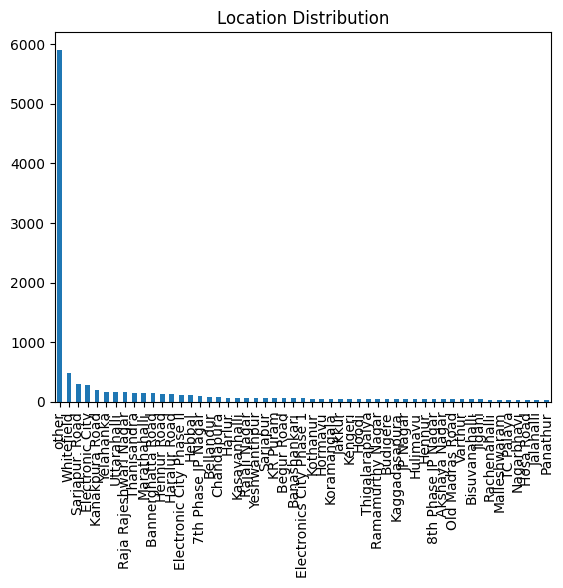

In [48]:
df['location'].value_counts().plot(kind='bar')
plt.title('Location Distribution')
plt.plot()

[]

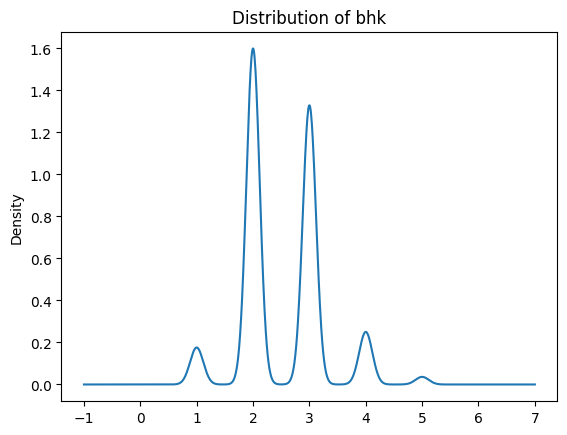

In [49]:
df['bhk'].plot(kind='kde')
plt.title('Distribution of bhk')
plt.plot()

[]

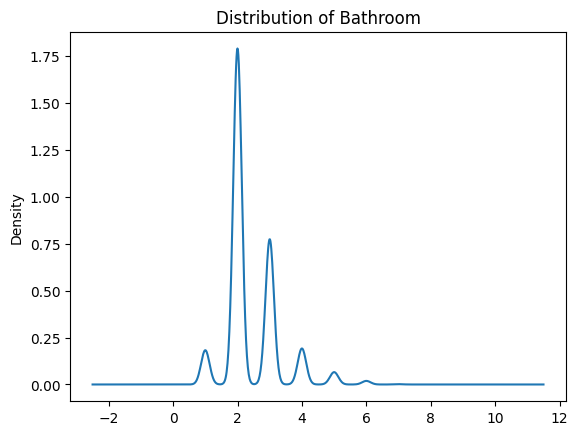

In [50]:
df['bath'].plot(kind='kde')
plt.title('Distribution of Bathroom')
plt.plot()

[]

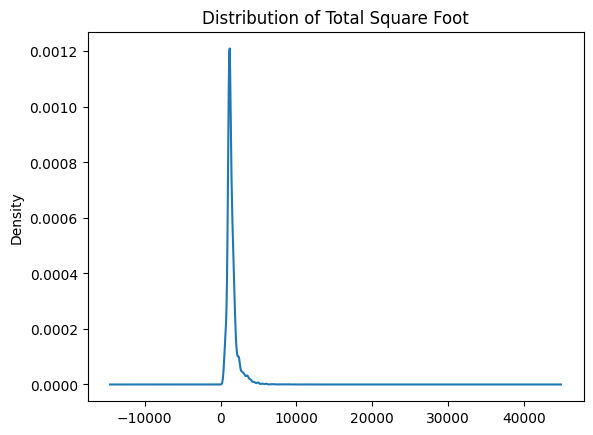

In [51]:
df['total_sqft'].plot(kind='kde')
plt.title('Distribution of Total Square Foot')
plt.plot()

[]

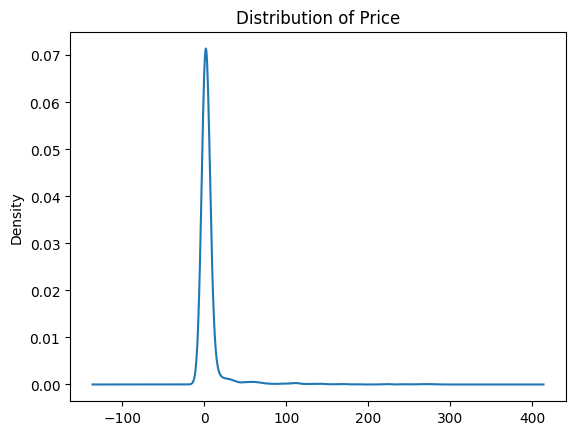

In [52]:
df['price'].value_counts().plot(kind='kde')
plt.title('Distribution of Price')
plt.plot()

In [53]:
df.to_csv(r'C:\Users\harsh\Desktop\MLOps_House_price\data\cleaned_data.csv')

In [54]:
X=df.drop(columns=['price'])
y=df['price']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer

import mlflow

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
print(X_train.shape)
print(X_test.shape)

(8537, 4)
(2135, 4)


### Applying Linear Regression

In [58]:
column_transform=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [59]:
scaler=StandardScaler()

In [60]:
lr=LinearRegression()

In [61]:
pipe_lr=make_pipeline(column_transform,scaler,lr) # data goes to column_transformer ---> scaler ---> linear_regression

In [62]:
pipe_lr.fit(X_train,y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [63]:
y_pred_lr=pipe_lr.predict(X_test)

In [64]:
r2_score(y_test,y_pred_lr)

0.820941116536298

### Applying Lasso Regression

In [65]:
lasso=Lasso()

In [66]:
pipe_lasso=make_pipeline(column_transform,scaler,lasso) # data goes to column_transformer ---> scaler ---> linear_regression

In [67]:
pipe_lasso.fit(X_train,y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [68]:
y_pred_lasso=pipe_lasso.predict(X_test)

In [69]:
r2_score(y_test,y_pred_lasso)

0.8145913498031379

### Applying Ridge Regression

In [70]:
ridge=Ridge()

In [71]:
pipe_ridge=make_pipeline(column_transform,scaler,lasso) # data goes to column_transformer ---> scaler ---> linear_regression

In [72]:
pipe_ridge.fit(X_train,y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [73]:
y_pred_ridge=pipe_lasso.predict(X_test)

In [74]:
r2_score(y_test,y_pred_ridge)

0.8145913498031379

# Applying Random Forest

In [75]:
rf_params={'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': 0.8,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(**rf_params)

In [77]:
pipe_rf=make_pipeline(column_transform,scaler,rf) # data goes to column_transformer ---> scaler ---> rf

In [78]:
pipe_rf.fit(X_train,y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, max_samples=0.8,
                                       random_state=4))])

In [79]:
y_pred_rf=pipe_rf.predict(X_test)

In [80]:
r2_score(y_test,y_pred_rf)

0.8145343862438886

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_squared_error(y_test,y_pred_rf)
mean_absolute_error(y_test,y_pred_rf)
mean_absolute_percentage_error(y_test,y_pred_rf)

metrics={
    'r2_score': r2_score(y_test,y_pred_rf),
    'mean_squared_error': mean_squared_error(y_test,y_pred_rf),
    'mean_absolute_error': mean_absolute_error(y_test,y_pred_rf),
    'mean_absolute_percentage_error': mean_absolute_percentage_error(y_test,y_pred_rf),
}

print(metrics)

{'r2_score': 0.8145343862438886, 'mean_squared_error': 787.5667862726895, 'mean_absolute_error': 17.443922016555035, 'mean_absolute_percentage_error': 0.22436136764248274}


In [82]:
print('LinearRegression',r2_score(y_test,y_pred_lr))
print('Lasso',r2_score(y_test,y_pred_lasso))
print('Ridge',r2_score(y_test,y_pred_ridge))
print('Random Forest Regressor',r2_score(y_test,y_pred_rf))

LinearRegression 0.820941116536298
Lasso 0.8145913498031379
Ridge 0.8145913498031379
Random Forest Regressor 0.8145343862438886


# MLFlow Tracking Code

In [83]:
pipe_rf.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                    ['location'])])),
  ('standardscaler', StandardScaler()),
  ('randomforestregressor',
   RandomForestRegressor(max_depth=10, max_samples=0.8, random_state=4))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                  ['location'])]),
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(max_depth=10, max_samples=0.8, random_state=4),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'passthrough',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('onehotencoder',
   OneHotEncoder(sparse=False),
   ['locatio

In [84]:
# check if URI is set

mlflow.is_tracking_uri_set()

False

### Run all the mlflow related tracking code in a single cell

In [86]:
# #set the tracking uri
# mlflow.set_tracking_uri('http://127.0.0.1:8000')

# #set an experiment name
# mlflow.set_experiment('House Price Prediction')

# #mlflow logging starts from here

# with mlflow.start_run(run_name='final run') as run:

#     #track input signature
#     signature=mlflow.models.infer_signature(model_input=X_train,
#                                   model_output=pipe_rf.predict(X_train),
#                                   )

#     #log params
#     mlflow.log_params(pipe_rf.get_params())

#     #log metrices
#     mlflow.log_metrics(metrics) #logging r2 score

#     #log model
#     mlflow.sklearn.log_model(pipe_rf,artifact_path='rf_model',signature=signature)

#     #create MLFlow data
#     data=mlflow.data.from_pandas(df=X_train,name='training')

#     #log the data
#     mlflow.log_input(dataset=data,context='training')



c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
c:\Users

# Grid Search CV

In [87]:
from sklearn.model_selection import GridSearchCV

In [98]:
#set the tracking uri
mlflow.set_tracking_uri('http://127.0.0.1:8000')

#set an experiment name
mlflow.set_experiment('Grid Search')

mlflow.sklearn.autolog()

params_grid={
    'randomforestregressor__n_estimators': list(range(100,600,100)),
    'randomforestregressor__max_samples': [0.8,0.9,0.7],
    'randomforestregressor__max_depth': [2,3,4],
}

with mlflow.start_run(run_name='outer',nested=True) as parent:

    #grid search object
    grid_search=GridSearchCV(estimator=pipe_rf,
                            cv=3,
                            param_grid=params_grid,
                            scoring='r2',
                            n_jobs=-1,
                            )

    #fit grid search
    grid_search.fit(X_train,y_train)

with mlflow.start_run(run_name='best_model') as best:
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("best r2 score",grid_search.best_score_)
    mlflow.sklearn.log_model(sk_model=grid_search.best_estimator_,
                            artifact_path='best_model')

2024/08/12 15:54:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: 

# Hyperopt
it is used in place of GridSearchCV as it reduces the time required using loacal minima finding method (like ML algorithms)

In [107]:
import numpy as np
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK

In [100]:
#define objective function

def objective(x): #we need to minimize this objective function
    return np.square(x-5) +4

print(objective(3))

8

In [102]:
#hyperparameter space
space=hp.uniform('x',-100,100)

In [105]:
best=fmin(fn=objective,space=space,algo=tpe.suggest,max_evals=1000)
best

100%|██████████| 1000/1000 [00:03<00:00, 300.80trial/s, best loss: 4.00493991271268]


{'x': 4.929715487391031}

# HyperOpt in MLFlow

In [106]:
#hyperparameter space
space={
    'n_estimators': hp.quniform('n_estimators',50,200,10),
    'max_depth':hp.quniform('max_depth',5,20,1),
    'criterian':hp.choice('criterian',['friedman_mse','squared_error'])
}

In [113]:
def objective(params):
    with mlflow.start_run(nested=True):
        #log the params
        mlflow.log_params(params)

        n_estimators=int(params['n_estimators'])
        max_depth=int(params['max_depth'])

        #model object
        pipe_rf.named_steps['randomforestregressor'].set_params(**{'n_estimators':n_estimators,'max_depth':max_depth})

        #model fit
        pipe_rf.fit(X_train, y_train)

        #calculate pedictions
        y_pred_rf=pipe_rf.predict(X_test)

        #calculate r2_score
        r2=r2_score(y_test,y_pred_rf)

        mlflow.log_metric('r2_score',r2)

    return {'loss': -r2 , "status":STATUS_OK}

In [114]:
#set the tracking uri
mlflow.set_tracking_uri('http://127.0.0.1:8000')

#set an experiment name
mlflow.set_experiment('HyperParameter Tuning using HyperOpt')

with mlflow.start_run(nested=True):
    trials=Trials()
    
    best=fmin(fn=objective,
              space=space,
              algo=tpe.suggest,
              max_evals=50,
              trials=trials)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2024/08/12 17:39:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

  2%|▏         | 1/50 [00:42<34:37, 42.41s/trial, best loss: -0.8069033798345976]

2024/08/12 17:39:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

  4%|▍         | 2/50 [01:09<26:32, 33.17s/trial, best loss: -0.8138549508835292]

2024/08/12 17:40:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

  6%|▌         | 3/50 [01:35<23:39, 30.21s/trial, best loss: -0.8147402546505539]

2024/08/12 17:40:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

  8%|▊         | 4/50 [02:23<28:24, 37.06s/trial, best loss: -0.8147402546505539]

2024/08/12 17:41:35 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 10%|█         | 5/50 [02:55<26:29, 35.33s/trial, best loss: -0.8147402546505539]

2024/08/12 17:42:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 12%|█▏        | 6/50 [03:24<24:13, 33.04s/trial, best loss: -0.8147402546505539]

2024/08/12 17:42:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 14%|█▍        | 7/50 [04:18<28:37, 39.93s/trial, best loss: -0.8147402546505539]

2024/08/12 17:43:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 16%|█▌        | 8/50 [05:11<30:48, 44.02s/trial, best loss: -0.8147402546505539]

2024/08/12 17:44:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 18%|█▊        | 9/50 [06:11<33:39, 49.26s/trial, best loss: -0.8150717277205612]

2024/08/12 17:45:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 20%|██        | 10/50 [06:39<28:28, 42.72s/trial, best loss: -0.8150717277205612]

2024/08/12 17:45:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 22%|██▏       | 11/50 [07:08<24:55, 38.34s/trial, best loss: -0.8150717277205612]

2024/08/12 17:46:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 24%|██▍       | 12/50 [07:37<22:25, 35.42s/trial, best loss: -0.815269325739856] 

2024/08/12 17:46:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 26%|██▌       | 13/50 [08:16<22:39, 36.75s/trial, best loss: -0.815269325739856]

2024/08/12 17:48:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 28%|██▊       | 14/50 [09:25<27:54, 46.51s/trial, best loss: -0.815269325739856]

2024/08/12 17:49:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 30%|███       | 15/50 [10:40<32:06, 55.04s/trial, best loss: -0.815269325739856]

2024/08/12 17:50:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 32%|███▏      | 16/50 [11:24<29:15, 51.64s/trial, best loss: -0.815269325739856]

2024/08/12 17:50:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 34%|███▍      | 17/50 [11:53<24:41, 44.90s/trial, best loss: -0.815269325739856]

2024/08/12 17:51:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 36%|███▌      | 18/50 [12:30<22:41, 42.53s/trial, best loss: -0.815269325739856]

2024/08/12 17:51:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 38%|███▊      | 19/50 [12:59<19:45, 38.25s/trial, best loss: -0.815269325739856]

2024/08/12 17:52:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 40%|████      | 20/50 [13:27<17:39, 35.31s/trial, best loss: -0.815269325739856]

2024/08/12 17:52:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 42%|████▏     | 21/50 [14:00<16:45, 34.68s/trial, best loss: -0.815269325739856]

2024/08/12 17:53:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 44%|████▍     | 22/50 [14:30<15:27, 33.13s/trial, best loss: -0.815269325739856]

2024/08/12 17:53:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 46%|████▌     | 23/50 [15:12<16:09, 35.90s/trial, best loss: -0.8160469364838387]

2024/08/12 17:54:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 48%|████▊     | 24/50 [16:28<20:45, 47.89s/trial, best loss: -0.8160469364838387]

2024/08/12 17:56:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 50%|█████     | 25/50 [17:45<23:33, 56.52s/trial, best loss: -0.8160469364838387]

2024/08/12 17:57:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 52%|█████▏    | 26/50 [19:00<24:53, 62.24s/trial, best loss: -0.8160469364838387]

2024/08/12 17:58:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 54%|█████▍    | 27/50 [20:13<25:04, 65.40s/trial, best loss: -0.8160469364838387]

2024/08/12 17:59:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 56%|█████▌    | 28/50 [21:27<24:53, 67.90s/trial, best loss: -0.8160469364838387]

2024/08/12 18:01:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 58%|█████▊    | 29/50 [22:41<24:24, 69.73s/trial, best loss: -0.8160469364838387]

2024/08/12 18:02:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 60%|██████    | 30/50 [23:54<23:35, 70.79s/trial, best loss: -0.8160469364838387]

2024/08/12 18:03:35 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 62%|██████▏   | 31/50 [25:11<22:58, 72.53s/trial, best loss: -0.8160469364838387]

2024/08/12 18:04:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 64%|██████▍   | 32/50 [26:21<21:35, 71.97s/trial, best loss: -0.8160469364838387]

2024/08/12 18:06:02 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 66%|██████▌   | 33/50 [27:34<20:29, 72.32s/trial, best loss: -0.8160469364838387]

2024/08/12 18:10:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 68%|██████▊   | 34/50 [32:23<36:33, 137.11s/trial, best loss: -0.8160469364838387]

2024/08/12 18:24:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 70%|███████   | 35/50 [46:20<1:26:48, 347.26s/trial, best loss: -0.8160469364838387]

2024/08/12 18:26:02 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 72%|███████▏  | 36/50 [47:36<1:01:59, 265.66s/trial, best loss: -0.8160469364838387]

2024/08/12 18:27:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 74%|███████▍  | 37/50 [48:45<44:47, 206.70s/trial, best loss: -0.8160469364838387]  

2024/08/12 18:28:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 76%|███████▌  | 38/50 [49:53<33:03, 165.30s/trial, best loss: -0.8160469364838387]

2024/08/12 18:29:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 78%|███████▊  | 39/50 [50:18<22:34, 123.10s/trial, best loss: -0.8160469364838387]

2024/08/12 18:29:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 80%|████████  | 40/50 [50:42<15:32, 93.29s/trial, best loss: -0.8160469364838387] 

2024/08/12 18:29:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 82%|████████▏ | 41/50 [51:07<10:55, 72.83s/trial, best loss: -0.8160469364838387]

2024/08/12 18:30:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 84%|████████▍ | 42/50 [51:43<08:13, 61.71s/trial, best loss: -0.8160469364838387]

2024/08/12 18:31:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 86%|████████▌ | 43/50 [52:58<07:40, 65.83s/trial, best loss: -0.8160469364838387]

2024/08/12 18:32:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 88%|████████▊ | 44/50 [54:12<06:49, 68.29s/trial, best loss: -0.8160469364838387]

2024/08/12 18:33:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 90%|█████████ | 45/50 [55:08<05:23, 64.71s/trial, best loss: -0.8161866773121644]

2024/08/12 18:34:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 92%|█████████▏| 46/50 [55:38<03:36, 54.21s/trial, best loss: -0.8161866773121644]

2024/08/12 18:34:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 94%|█████████▍| 47/50 [56:03<02:16, 45.54s/trial, best loss: -0.8161866773121644]

2024/08/12 18:35:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 96%|█████████▌| 48/50 [56:29<01:18, 39.41s/trial, best loss: -0.8161866773121644]

2024/08/12 18:35:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

 98%|█████████▊| 49/50 [57:05<00:38, 38.43s/trial, best loss: -0.8161866773121644]

2024/08/12 18:36:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

100%|██████████| 50/50 [58:21<00:00, 70.02s/trial, best loss: -0.8161866773121644]

2024/08/12 18:37:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run sassy-wren-354 at: http://127.0.0.1:8000/#/experiments/374567655391773237/runs/9b0d97600aeb4146b7bf2ad47065c578.
2024/08/12 18:37:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8000/#/experiments/374567655391773237.


RestException: INVALID_PARAMETER_VALUE: The run 9b0d97600aeb4146b7bf2ad47065c578 must be in 'active' lifecycle_stage.